# Creating New GitHub Repo with Jupyter Notebook

In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import pandas as pd 
# code: "from sklearn.model_selection import train_test_split"

In [4]:
df = pd.read_csv('real_estate_db.csv', encoding='latin-1') # imports the CSV into the local notebook.

In [5]:
df.drop_duplicates(subset=None, inplace=True) # drops duplicates to a new file.
df.to_csv('real_estate_db.csv', index=False) # replaces the file from the old one to the newly duplicate-removed file.

In [6]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df.to_csv('real_estate_db.csv', index=False) # replaces the file from the old one to the newly NaN-cell-filled file.

In [7]:
df_sampled = df.sample(frac=0.1) # samples 0.1 of the db.

In [8]:
df_sampled.head() # prints the first five indexes of the new sampled db.

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
3859,227816,NaN,140,59,6,California,CA,Anaheim,Anaheim City,City,...,39.76679,43.50000,22.32976,570.21705,2393.0,0.90741,0.62791,0.00657,0.00657,0.02326
35535,288383,NaN,140,35,49,Utah,UT,Murray,Murray City,City,...,39.89407,40.00000,23.82329,453.87683,1754.0,0.55688,0.41917,0.01610,0.00000,0.22323
35353,288033,NaN,140,489,48,Texas,TX,Harlingen,Lasana,Town,...,39.60229,39.41667,22.40208,302.11510,1257.0,0.84177,0.49502,0.07968,0.00797,0.02291
27653,273335,NaN,140,147,39,Ohio,OH,Fostoria,Fostoria City,Village,...,41.16078,39.25000,23.03059,462.69083,1858.0,0.74655,0.44751,0.03039,0.00760,0.14227
20090,258756,NaN,140,47,28,Mississippi,MS,Biloxi,Saucier,CDP,...,42.91487,43.91667,20.38855,596.83616,2591.0,0.90248,0.64583,0.02240,0.02240,0.10990


In [9]:
print(df_sampled[['debt', 'hs_degree']])

          debt  hs_degree
3859   0.81597    0.97779
35535  0.53149    0.91337
35353  0.24730    0.62542
27653  0.70152    0.85476
20090  0.57904    0.90233
...        ...        ...
6990   0.58773    0.87076
14842  0.41826    0.80038
102    0.49265    0.94521
19128  0.68916    0.94876
36877  0.69673    0.71953

[3872 rows x 2 columns]


                  hs_degree  hs_degree_male  hs_degree_female      debt  \
hs_degree          1.000000        0.963504          0.954249  0.294761   
hs_degree_male     0.963504        1.000000          0.849959  0.293876   
hs_degree_female   0.954249        0.849959          1.000000  0.271661   
debt               0.294761        0.293876          0.271661  1.000000   
rent_mean          0.374357        0.390757          0.332791  0.443570   

                  rent_mean  
hs_degree          0.374357  
hs_degree_male     0.390757  
hs_degree_female   0.332791  
debt               0.443570  
rent_mean          1.000000  


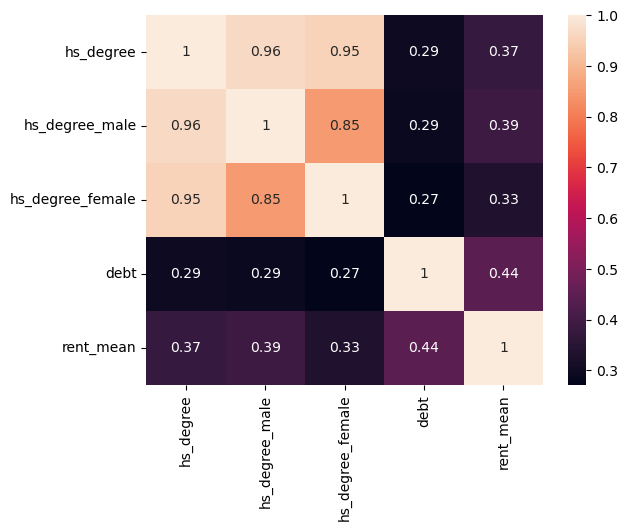

In [10]:
import matplotlib.pyplot as mp 
import seaborn as sb 
from PIL import _imaging
from PIL import Image
  
# import file with data 
data = df_sampled[['hs_degree', 'hs_degree_male', 'hs_degree_female', 'debt', 'rent_mean', ]]
# prints data that will be plotted 
# columns shown here are selected by corr() since 
# they are ideal for the plot 
print(data.corr()) 
  
# plotting correlation heatmap 
dataplot=sb.heatmap(data.corr(), annot=True)
  
# displaying heatmap 
mp.show() 

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [43]:
df_large = df[df['rent_mean'] >= 2500]

In [40]:
len(df_large)

1517

In [25]:
crs = ccrs.LambertConformal(central_longitude=-100, central_latitude=45)

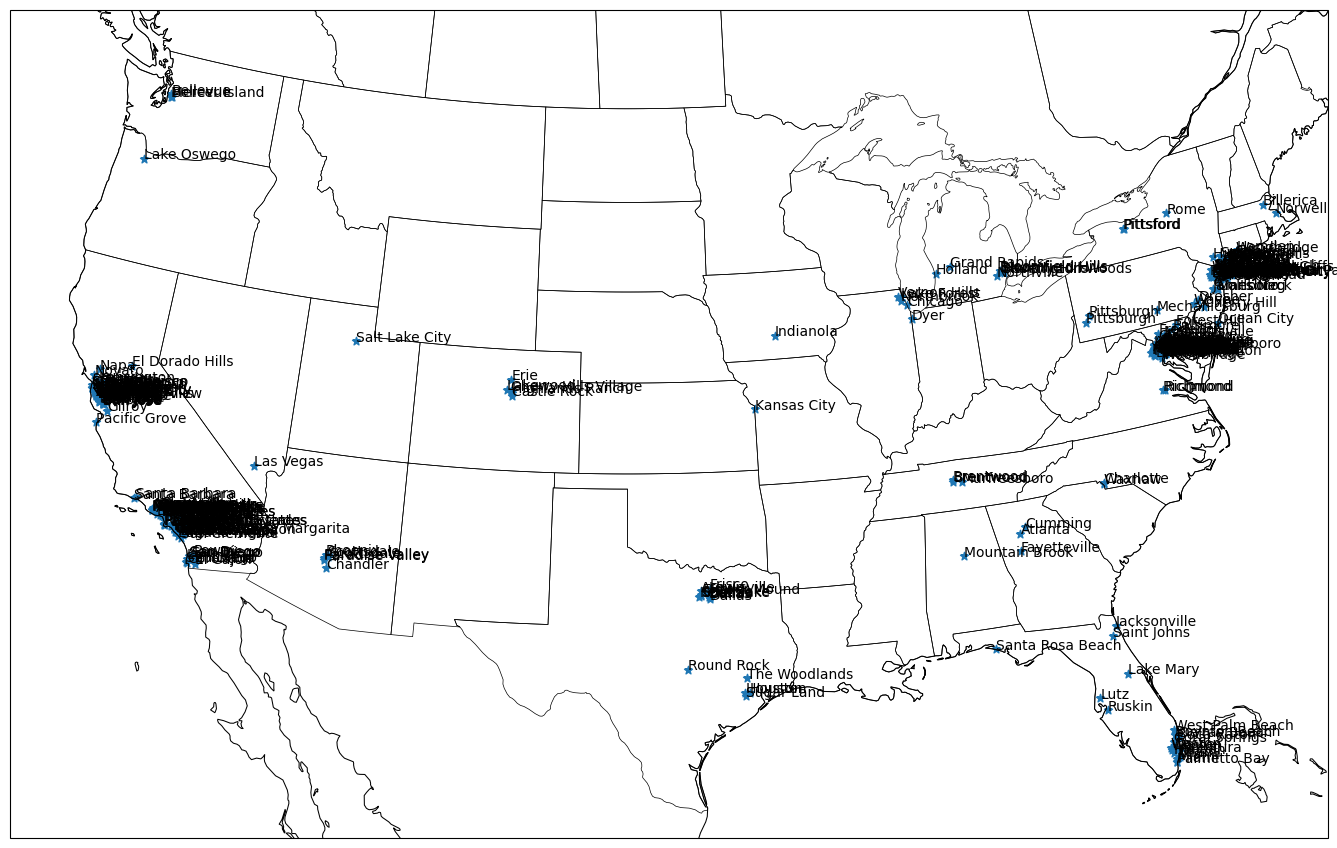

In [44]:
fig = mp.figure(figsize=(17, 12))
ax = fig.add_subplot(1, 1, 1, projection=crs)
ax.set_extent((-122, -75, 25, 50), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.75)
ax.add_feature(cfeature.STATES, linewidth=0.5)

for _, city in df_large.iterrows():
    ax.scatter(city['lng'], city['lat'], transform=ccrs.PlateCarree(), color='tab:blue', marker='*')
    ax.text(city['lng'], city['lat'], city['city'], transform=ccrs.PlateCarree(), clip_on=True)